Primera version que calculaba los cambios de la energia y el momentum angular total

In [3]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D
from Rk4 import solver


#constants
G=4*np.pi**2 #Au**3 year**-2 Msun**-1



#initial conditions 
x=np.array([0,1])
y=np.array([0,0])
z=np.array([0,0])
vx=np.array([0,0])
vy=np.array([0,6.27776068])
vz=np.array([0,0])
mass=np.array([1,3.00273e-6])

#number of objects
m=len(mass)

#equations
def ODE(t,q,mass):
    #number of planets
    n=len(mass)
    f=np.zeros_like(q)
    
    #x equation
    f[:,:3]=q[:,3:]
    
    #v equation
    for i in range(n):
        for j in range(n):
            if i==j:
                pass
            else:
                xij=q[i,:3]-q[j,:3]
                f[i,3:]+=-G*mass[j]*xij/(np.linalg.norm(xij)**3)
    return f

#energy
def total_energy(q,mass):
    m=len(mass)
    KE=0.
    PE=0.
    
    for i in range(m):
        KE+=mass[i]*(np.dot(q[i,3:],q[i,3:]))/2
        for j in range(i):
            xij=q[i,:3]-q[j,:3]
            PE+=-G*mass[i]*mass[j]/np.linalg.norm(xij)
        
    
    return KE+PE



def total_L(q,mass):
    m=len(mass)
    L=0.
    
    for i in range(m):
        r, v=q[i,:3],q[i,3:]
        L+=np.linalg.norm(np.cross(r,mass[i]*v))
    return L
        

#saving coordinates and velocity as consecutive vectors
q=np.ones((m,6*2))

#initial conditions
q[:,:6] = np.array((x,y,z,vx,vy,vz)).transpose()

#function that calculates absolute change of total energy and angular momenta

def Rk4(q,mass,dt,ti,tf):
    #time grid
    t=np.arange(ti,tf+dt,dt)
    dt=t[1]-t[0]
    #number of points
    N=len(t)

    #saving energy and angular momentum
    Delta_Energy=np.zeros(N)
    Delta_L=np.ones(N)

    #time evolution
    for i in range(N):

        #save old energy and angular momentum
        old_TE=total_energy(q[:,:6],mass).copy()
        old_L=total_L(q[:,:6],mass).copy()
        #advance one step 
        q[:,6:12]=solver(dt,t,q[:,:6],lambda t,x:ODE(t,x,mass)).copy()
        #save new energy and angular momentum
        new_TE=total_energy(q[:,6:12],mass).copy()
        new_L=total_L(q[:,6:12],mass).copy()
        #save delta_E and delta_L
        Delta_Energy[i]=np.abs((new_TE-old_TE)/old_TE)
        Delta_L[i]=np.abs((new_L-old_L)/old_L)

        #repeat cicle
        q[:,:6]=q[:,6:12].copy()
    
    return (t,Delta_Energy,Delta_L)




#t,Delta_E, Delta_L= Rk4(q,mass,0.01,0,1e3)

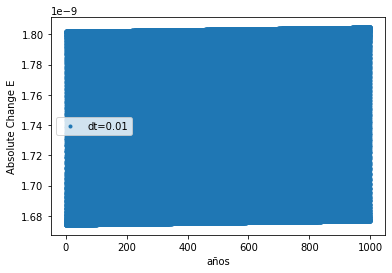

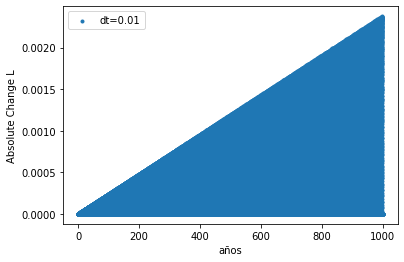

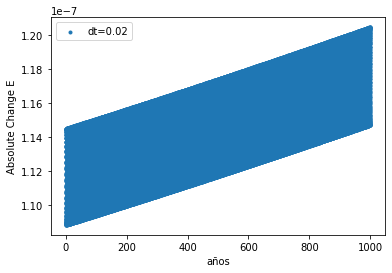

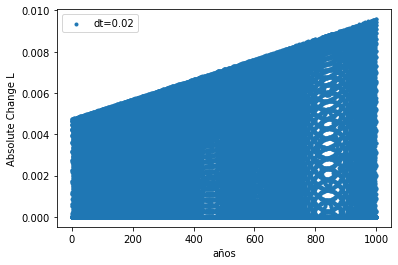

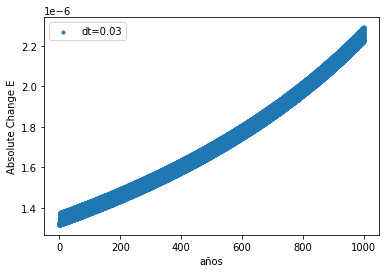

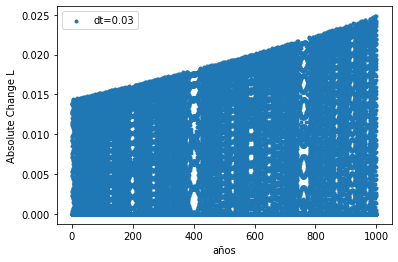

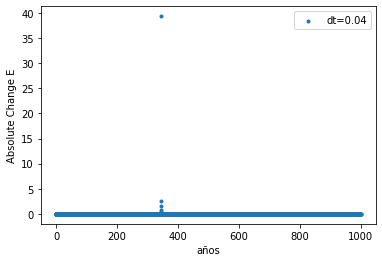

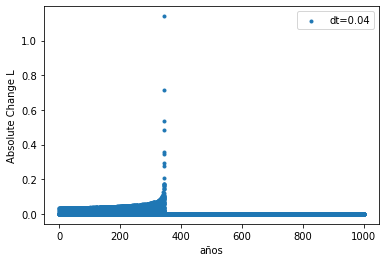

In [4]:
#function that plots 
for i in range(4):
    data= Rk4(q,mass,(i+1)/100,0,1e3)
    plt.figure()
    plt.scatter(data[0], data[1],marker=".",label=f"dt={(i+1)/100}")
    plt.xlabel("años")
    plt.ylabel("Absolute Change E")
    plt.legend()
    plt.savefig(f"rk4_0.0{i+1}_E.jpeg")
    plt.show()
    plt.scatter(data[0], data[2],marker=".",label=f"dt={(i+1)/100}")
    plt.xlabel("años")
    plt.ylabel("Absolute Change L")
    plt.legend()
    plt.savefig(f"rk4_0.0{i+1}_L.jpeg")
    plt.show()